# HR Turn Over Analytics

## Data Diri
Nama Lengkap: Kresna Devara

## Import Library

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('HR_Analytics.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis

### Deskripsi dan Check Data

***Penjelasan Data***
***
- satisfaction_level: Angka kepuasan yang dibeirkan karyawan (0-1)
- last_evaluation: Angka penilaian dari manager (0-1)
- number_project: Jumlah projek yang pernah dikerjakan karyawan
- average_monthly_hours: Total jam kerja per bulan
- time_spend_company: Total masa kerja dalam tahun
- Work_accident: Dummy variable terjadinya kecelakaan: Ya (1), Tidak (0)
- left: Dummy variable: Keluar (1), Tetap (0)
- promoted_last_5years: Dummy variable, Dipromosikan (1), Tidak dipromosikan(0)
- sales: Nama department (sales,technical,support,IT, product,marketing, other)
- salary: 3-level kategori sallary (low, medium, high)

***Data Check***
***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
print("Total Null data: " + str(df.isnull().sum().sum()))
print("Total NA data: " + str(df.isna().sum().sum()))

Total Null data: 0
Total NA data: 0


Tidak ada data yang kosong

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check Outlier

Data numerik pada dataset hanyalah: 
- satisfaction_level
- last_evaluation
- number_project
- average_montly_hours
- time_spend_company 

Sehingga hanya data tersebut saja yang akan dilakukan pengecekan


In [6]:
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 
                   'average_montly_hours', 'time_spend_company']

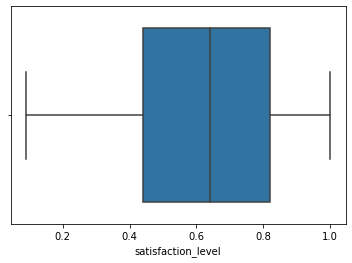

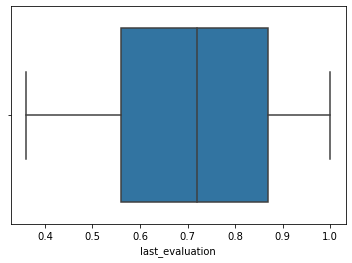

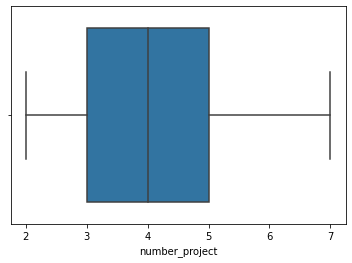

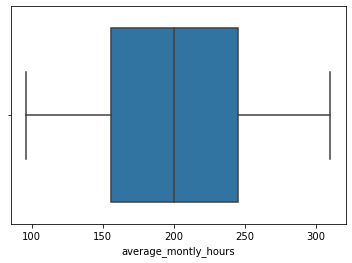

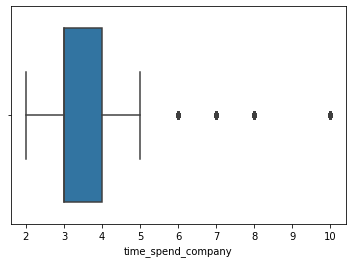

In [11]:
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=df[column])

Dari data di atas hanya `time_spend_company` saja yang memiliki __outliers__ walaupun datanya sedikit, namun data lamanya tahun pada perusahaan sangatlah berpengaruh terhadap keputusan pergi atau tidaknya karyawan dari suatu perusahaan, sehingga data `time_spend_company` ___tidak dibuang___

### Univariate Analysis